# Sanity check

In [1]:
!which python

/home/amar/Desktop/projects/NFS/nfs_venv/bin/python


In [2]:
!pwd

/home/amar/Desktop/projects/NFS


# Imports

In [3]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Files and Paths

In [4]:
project_dir = os.getcwd()
paths = {
    'project_dir': project_dir,
    'input_videos': os.path.join(project_dir, 'data', 'videos'),
    'output_videos': os.path.join(project_dir, 'data', 'outputs')
}

files = {
    'input_video': os.path.join(paths['input_videos'], 'highway_footage_high_res_hood.avi')
}

# Reading data

In [19]:
'paths', paths, 'files', files

('paths',
 {'project_dir': '/home/amar/Desktop/projects/NFS',
  'input_videos': '/home/amar/Desktop/projects/NFS/data/videos',
  'output_videos': '/home/amar/Desktop/projects/NFS/data/outputs'},
 'files',
 {'input_video': '/home/amar/Desktop/projects/NFS/data/videos/highway_footage_high_res_hood.avi'})

In [54]:
def show_video(dir_=None, filename=None):
    '''
    Shows a video from the path provided in a seperate window.
        Parameters:
            dir_ (str): Directory where the video exists
            filename (str): Name of the video file
        Returns:
            None
    '''
    if not dir_ or not filename:
        cap = cv.VideoCapture(files['input_video'])
    else:
        cap = cv.VideoCapture(os.path.join(dir_, filename))
    while True:
        ret, frame = cap.read()
        if ret:
            cv.imshow('Input video', frame)
        else:
            print('Video not read, exiting...')
            break
            
        if cv.waitKey(1) == ord('q'):
            print('Key pressed, exiting...')
            break
            
    cv.destroyAllWindows()
    cap.release()

In [55]:
def show_image(frame, convert=True):
    '''
    Shows an image using matplotlib.pyplot.
    Parameters:
        frame (np.ndarray): Array of the image pixel intensities
        convert (bool): Set True to convert from BGR to RGB
    Returns:
        None
    '''
    if convert:
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

In [65]:
def get_frame_from_video(video_file, frame_number=0):
    '''
    Gets a frame from the video specified.
    Parameters:
        video_file (str): path to the video file
        frame_number (int): Frame to return
    Returns:
        result_frame (np.ndarray): The pixel intensity values of the frame in BGR format
    '''
    cap = cv.VideoCapture(video_file)
    result_frame = None
    count = 0
    while True:
        ret, frame = cap.read()
        if ret:
            if count == frame_number:
                result_frame = frame
                return result_frame
        else:
            print('File not found, exiting...')
            break
        count += 1

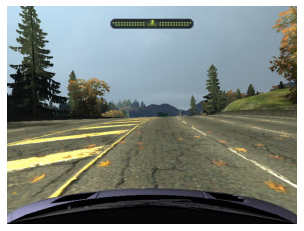

(480, 640, 3)

In [66]:
# show_video()
screenshot = get_frame_from_video(video_file=files['input_video'], frame_number=2500)
show_image(screenshot, convert=True)
screenshot.shape

# Filters

## HSV

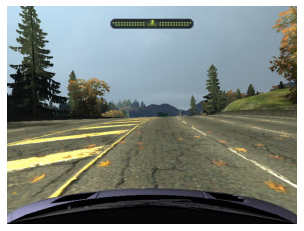

(480, 640, 3)

In [67]:
# show_video()
screenshot = get_frame_from_video(video_file=files['input_video'], frame_number=2500)
show_image(screenshot, convert=True)
screenshot.shape

In [68]:
class HSVFilter:
    def __init__(self, filter_=[None]*6):
        '''
        Parameters:
            self
            filter_ (list): [hmin, hmax, smin, smax, vmin ,vmax]
        '''
        self.hmin = filter_[0]
        self.hmax = filter_[1]
        self.smin = filter_[2]
        self.smax = filter_[3]
        self.vmin = filter_[4]
        self.vmax = filter_[5]
        
    def apply_filter(self, original_image):
        '''
        Applies the hsv filter to the image and converts it back to BGR
        Parameters:
            original_image (np.ndarray): The image pixel intensity values.
        Returns:
            result (np.ndarray): The image pixel intensity values for the converted image
        '''
        image_hsv = cv.cvtColor(original_image, cv.COLOR_BGR2HSV)
        
        lower = np.array([self.hmin, self.smin, self.vmin])
        upper = np.array([self.hmax, self.smax, self.vmax])
        
        mask = cv.inRange(image_hsv, lower, upper)
        image_threshold = cv.bitwise_and(image_hsv, image_hsv, mask=mask)
        result = cv.cvtColor(image_threshold, cv.COLOR_HSV2BGR)
        
        return result

In [69]:
def nothing(position):
    '''
    I do nothing.
    Parameters:
        position
    '''
    pass

def create_trackbar_window(window_name='Trackbars'):
    '''
    Creates the trackbar in the window_name specified.
    Parameters:
        window_name (str): Window name for the trackbar window.
    Returns:
        None
    '''
    cv.createTrackbar('Hmin', window_name, 0, 179, nothing)
    cv.createTrackbar('Hmax', window_name, 0, 179, nothing)
    cv.createTrackbar('Smin', window_name, 0, 255, nothing)
    cv.createTrackbar('Smax', window_name, 0, 255, nothing)
    cv.createTrackbar('Vmin', window_name, 0, 255, nothing)
    cv.createTrackbar('Vmax', window_name, 0, 255, nothing)

In [70]:
def get_new_filter(filter_object, window_name='Trackbars'):
    '''
    Returns the new initialized state of the filter
    Parameters:
        filter_object (HSVFilter object): The filter that takes the information from the trackbar window.
        window_name (str): Name of the trackbar window.
    Returns:
        filter_object (HSVFilter object): The filter with new initialized values
    '''
    filter_object.hmin = cv.getTrackbarPos('Hmin', window_name)
    filter_object.hmax = cv.getTrackbarPos('Hmax', window_name)
    filter_object.smin = cv.getTrackbarPos('Smin', window_name)
    filter_object.smax = cv.getTrackbarPos('Smax', window_name)
    filter_object.vmin = cv.getTrackbarPos('Vmin', window_name)
    filter_object.vmax = cv.getTrackbarPos('Vmax', window_name)
    
    return filter_object

In [71]:
files

{'input_video': '/home/amar/Desktop/projects/NFS/data/videos/highway_footage_high_res_hood.avi'}

In [78]:
original_window_name = 'Original image'
thresholded_window_name = 'Thresholded image'
trackbar_window_name = 'Trackbars'
base_filter = [0, 45, 0, 125, 175, 255]

try:
    cv.namedWindow(thresholded_window_name)
    cv.namedWindow(trackbar_window_name)
    create_trackbar_window(trackbar_window_name)
    
    hsv_filter = HSVFilter(base_filter)
    
    # cap = cv.VideoCapture(files['input_video'])
    test_frame = get_frame_from_video(files['input_video'], frame_number=0)
    
    while True:
        # FOR IMAGES
        hsv_filter = get_new_filter(hsv_filter)
        filtered_frame = hsv_filter.apply_filter(test_frame)
        cv.imshow(thresholded_window_name, filtered_frame)
        if cv.waitKey(10) == ord('q'):
            break
        
        # FOR VIDEOS 
        # ret, frame = cap.read()
        # if ret:
        #     # hsv_filter = get_new_filter(hsv_filter)
        #     filtered_frame = hsv_filter.apply_filter(frame)
        #     # cv.imshow(original_window_name, frame)
        #     cv.imshow(thresholded_window_name, filtered_frame)
        #     if cv.waitKey(1) == ord('q'):
        #         break
        # else:
        #     print('Video not read, Exiting...')
        #     cv.destroyAllWindows()
        #     break
            
    cv.destroyAllWindows()
except Exception as e:
    print(e)
    cv.destroyAllWindows()
